# Decision Trees and Random Forests

## 1. Business Understanding
The goal of this analysis is to declare if the website is a phishing site by measuring it's features. The dataset will be analysed with decision tree and random forest classifiers.

## 2. Data Understanding

## 3. Data Preparation

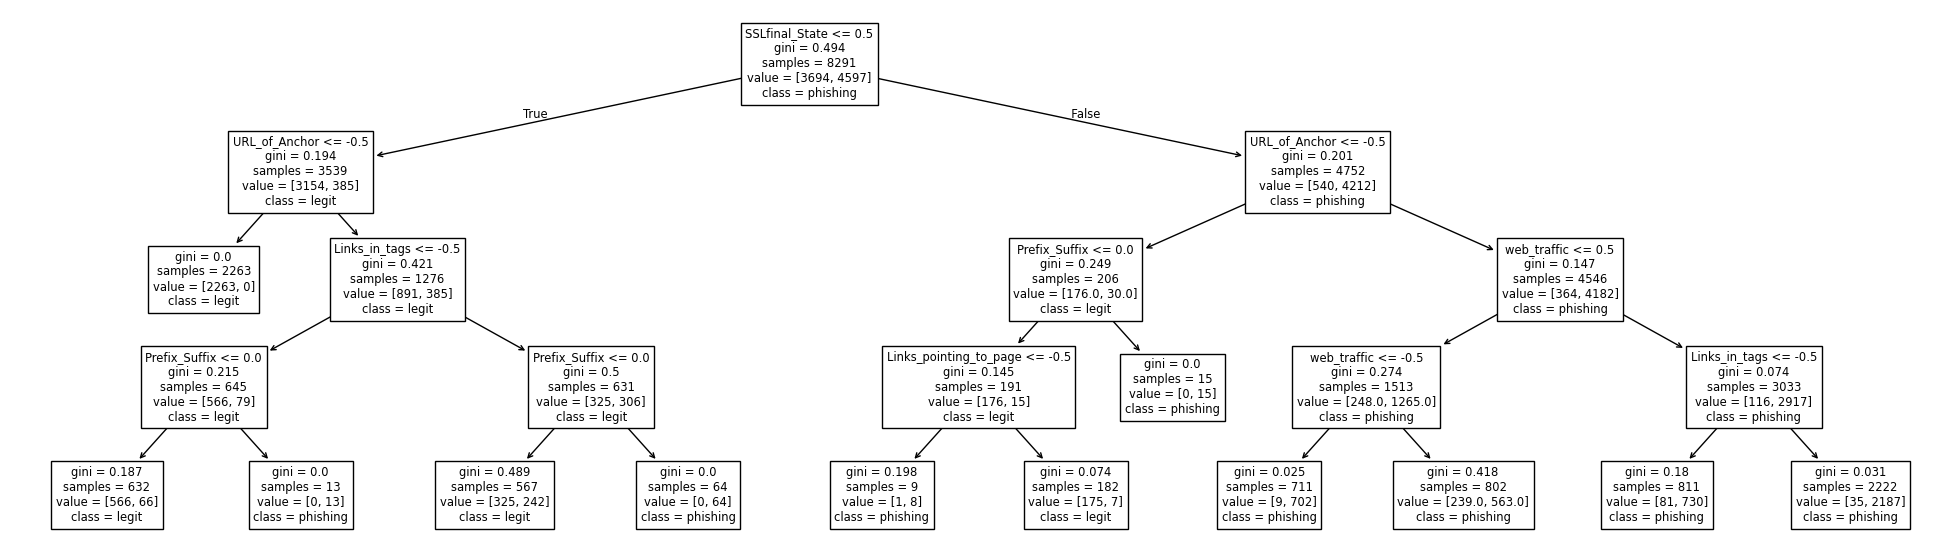

Accuracy score:


0.9175108538350217

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv('datasets/phishing.csv')
X = df.drop(['Result'], axis = 1)
y = df['Result'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

model = DecisionTreeClassifier(max_depth=4, random_state=20)
model.fit(X_train, y_train)

fig = plt.figure(figsize = (25, 7))
plot_tree(model, feature_names = X.keys(), class_names = ['legit', 'phishing'])
plt.show()

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

print('Accuracy score:')
accuracy_score(y_test, y_pred)

## 4. Modeling

## 5. Evaluation

## 6. Deployment